# Exploração de Dados

In [1]:
# bibliotecas necessárias para nosso experimento
import time

import numpy             as np
import pandas            as pd
import pydataset         as dt
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.manifold  import TSNE
from sklearn.preprocessing import StandardScaler



### Dados 
Pydataset contém uma coleção de conjuntos de dados para fazermos alguns experimentos. Muitos dos conjuntos já estão tratados. Desta forma, vamos aqui apenas aplicar algumas estatísticas descritivas.

In [2]:
dt.data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


### USA Arrests

Violent Crime Rates By US State.

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

link: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/USArrests

In [3]:
df = dt.data('USArrests')


## Analisando os dados

In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Perguntas acerca dos exemplos
Quais são os estados com maiores e menores taxa de mortalidade ?
Quais são os estados com maiores e menores taxa de estupro ?
Quais são os estados com maior e menor população ?

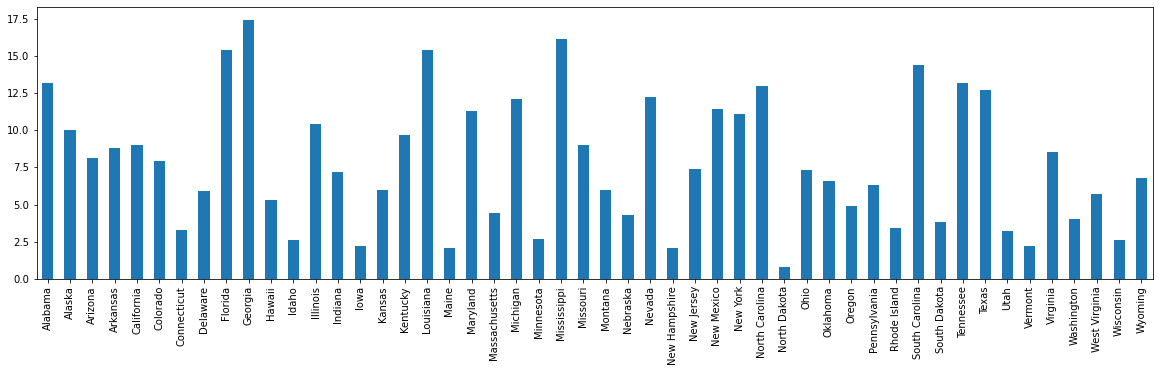

In [10]:
df.Murder.plot.bar(figsize=(20,5));
#df.Murder.plot.pie(figsize=(10,10));

## Análise das nossas variáveis


### Histogramas
Como se tratam de dados contínuos vamos plotar os histogramas para cada variável (feature)

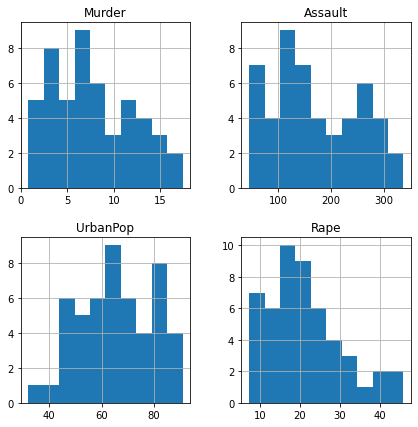

In [11]:
df.hist(figsize=(7,7));
    

### Agora vamos analisa a similaridade entre variáveis

### Anlisando par a par
Quando temos poucas variáveis, podemos fazer uma análise par a par dos nossos dados. Lembre-se sempre que uma análise completa par a par gera $ 2^{(m-1)} - 1$  gráficos, em que m é o número de variáveis. Portanto, com 11 variáveis, já teríamos 1023 gráficos. 

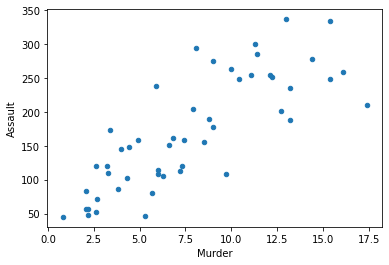

In [12]:
df[["Murder","Assault"]].plot.scatter(x="Murder",y="Assault");

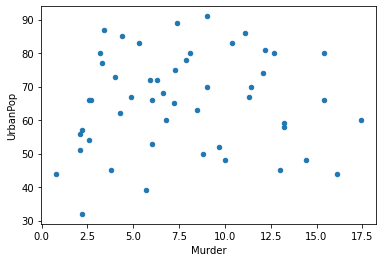

In [13]:
df[["Murder","UrbanPop"]].plot.scatter(x="Murder",y="UrbanPop");

### Correlação
Vamos analisar o quanto cada par de variável é similar independente do número de variáveis!

In [14]:
df.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


### Avançado - Que tal analisarmos a relação entre os estados consierando todas as variáveis que temos?
Usaremos aqui a técnica denominada t-SNE.

In [19]:
df   = dt.data('USArrests') # deixo aqui para que se eu quiser capturar de novo só para garantir o original, sem precisar ir na célula lá de cima.

# se eu quiser, posso remover algumas colunas de forma a deixar apenas o que eu quero usar como dados para a projeção.
df   = df.drop(["Murder"],axis=1)

data = StandardScaler().fit_transform(df) # normalizamos as colunas para que todas fiquem na mesma ordem de grandeza. Se não fizermos isto, uma coluna com ordem de grandeza elevada vai dominar as outras e vai impactar mais nas projeções


In [20]:

time_start = time.time()

# mapeamento
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(data)

print ('t-SNE terminado! Tempo decorrido: {} s'.format(time.time()-time_start))

t-SNE terminado! Tempo decorrido: 1.0202808380126953 s


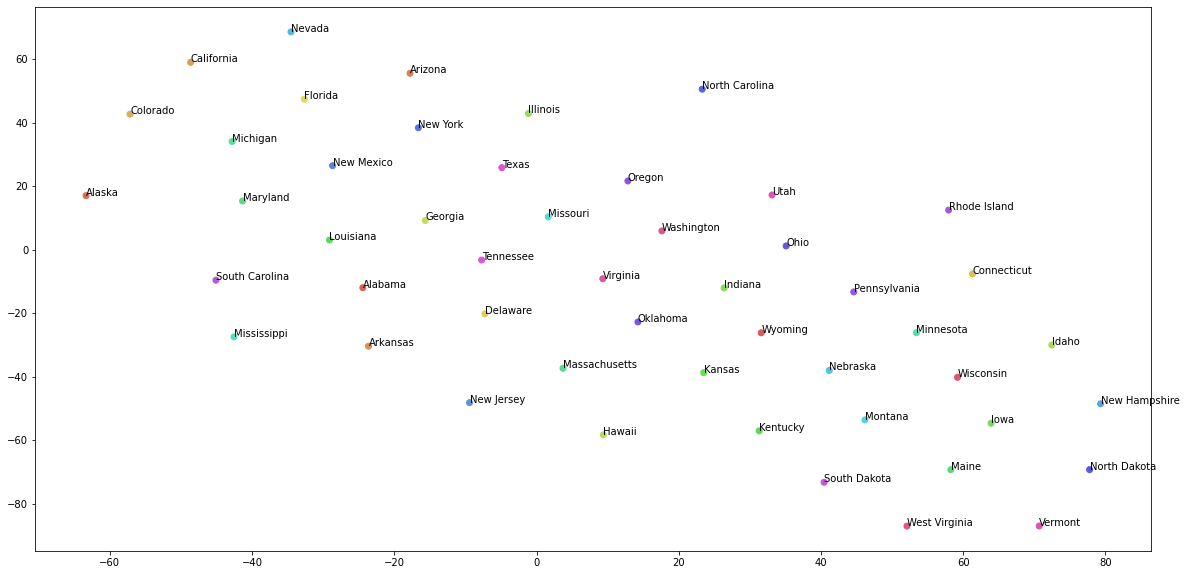

In [21]:
tsne_results = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

labels       = df.index
palette      = np.array(sns.color_palette("hls", len(labels)))

fig, ax      = plt.subplots()
fig.set_size_inches(20,10)

ax.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=palette, cmap=plt.cm.get_cmap('Paired'))

for p,label in zip(tsne_results.values,labels.values):
    ax.annotate(label,p)

